In [83]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
df = pd.read_csv('Downloads/archive/USvideos.csv')

## Unsupervised Analysis
### Association
- How certain features of a data sample correlate with other features

In [190]:
df["publish_time"]=pd.to_datetime(df["publish_time"])
df["trending_date"] = pd.to_datetime(df["trending_date"],format="%y.%d.%m")

In [191]:
from sklearn.preprocessing import MinMaxScaler

newdf = df[['trending_date','title','channel_title','category_id','publish_time','tags','views','likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed','description']]

# splitting data
train, test = train_test_split(newdf, shuffle=True, test_size = 0.33)

In [113]:
def likes_dislikes_barchart(feature):
    likes_greater = train[train['likes'] > train['dislikes']][feature].value_counts()
    dislikes_greater = train[train['dislikes'] > train['likes']][feature].value_counts()
    chart_df = pd.DataFrame([likes_greater,dislikes_greater])
    chart_df.index = ['likes_greater','dislikes_greater']
    chart_df.plot(kind='bar',stacked=True, figsize=(10,5))

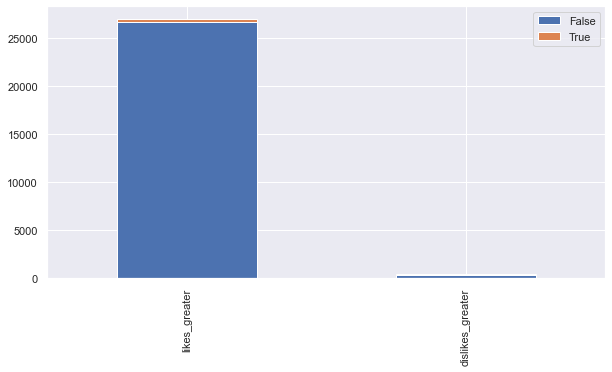

In [114]:
likes_dislikes_barchart('comments_disabled')

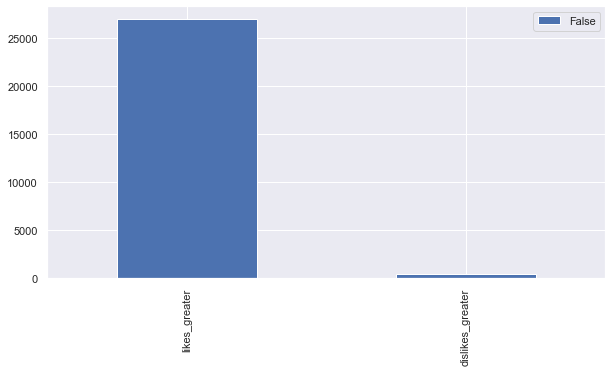

In [115]:
likes_dislikes_barchart('ratings_disabled')

## Feature Engineering

In [134]:
# Derive features
newdf = newdf.assign(day = newdf.publish_time.dt.day, month = newdf.publish_time.dt.month, year = newdf.publish_time.dt.year)

# Data cleaning
newdf.drop(newdf[newdf['year'] < 2017].index, inplace = True)

<AxesSubplot:xlabel='year', ylabel='views'>

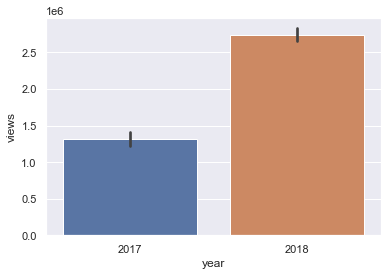

In [136]:
sns.barplot(x = newdf['year'], y = newdf['views'])

<AxesSubplot:xlabel='year', ylabel='likes'>

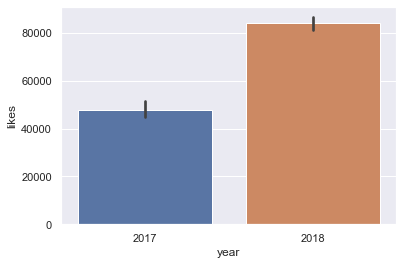

In [137]:
sns.barplot(x = newdf['year'], y = newdf['likes'])

<AxesSubplot:xlabel='month', ylabel='views'>

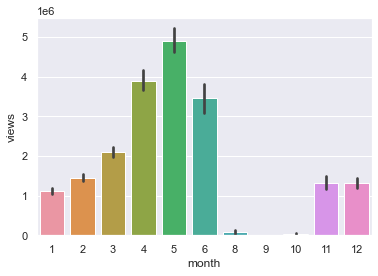

In [138]:
sns.barplot(x = newdf['month'], y = newdf['views'])

<AxesSubplot:xlabel='month', ylabel='likes'>

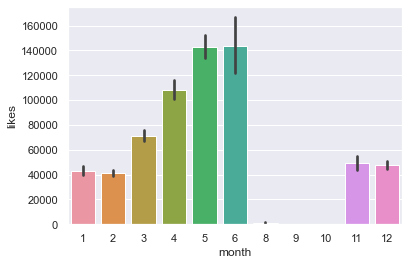

In [139]:
sns.barplot(x = newdf['month'], y = newdf['likes'])

/Users/RainaKim/miniconda3/envs/wemowa/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='views', ylabel='likes'>

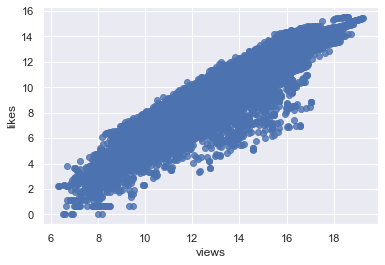

In [143]:
x = np.log(df['views'])
y = np.log(df['likes'])
sns.regplot(x=x,y=y,fit_reg=False)

<AxesSubplot:xlabel='views', ylabel='dislikes'>

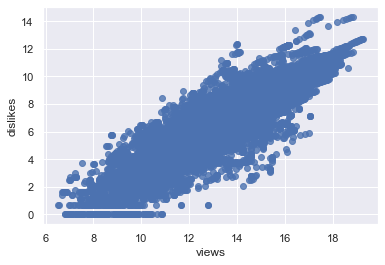

In [144]:
y = np.log(df['dislikes'])
sns.regplot(x=x,y=y,fit_reg=False)

In [52]:
xdf = df[['category_id','views','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed']]
ydf = df[['likes']]


## Feature Scaling

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(xdf, ydf, shuffle=True, test_size=0.33)
Xtr.head()

In [152]:
Xtr_scale = scaler.fit_transform(Xtr)
Xts_scale = scaler.transform(Xts)

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Linear Regression

In [154]:
lg = LinearRegression(fit_intercept = True)
model = lg.fit(Xtr_scale,ytr)
predict = lg.predict(Xts_scale)

In [156]:
r2_score(yts,predict)

0.8790667216333045

### Adding L2 Regularization (Ridge Regression)

In [185]:
# The higher the alpha value, more restrictions on the coefficients
ridge = Ridge(alpha = 0.01)
ridge.fit(Xtr_scale,ytr)

Ridge(alpha=0.01)

In [186]:
larger_ridge = Ridge(alpha = 1)
larger_ridge.fit(Xtr_scale,ytr)

Ridge(alpha=1)

### Results
- Comparing the accuracy

In [187]:
# without regularization
train_accuracy = lg.score(Xtr_scale,ytr)
test_accuracy = lg.score(Xts_scale,yts)

# with regularization alpha = 0.01
train_accuracy_ridge = ridge.score(Xtr_scale,ytr)
test_accuracy_ridge = ridge.score(Xts_scale,yts)

# with regularization alpha = 1
train_accuracy_ridge1 = larger_ridge.score(Xtr_scale,ytr)
test_accuracy_ridge1 = larger_ridge.score(Xts_scale,yts)

In [188]:
from IPython.display import display

result = {"ridge":[False,True,True],"alpha":[None,0.01,1],"train accuracy":[train_accuracy,train_accuracy_ridge,train_accuracy_ridge1],"test accuracy":[test_accuracy,test_accuracy_ridge,test_accuracy_ridge1]}
display(pd.DataFrame(result))

,ridge,alpha,train accuracy,test accuracy
0,False,NaN,0.888640,0.879067
1,True,0.01,0.888640,0.879043
2,True,1.00,0.885195,0.873723
